In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 1
%aimport image_generator

import os
import openai
import pandas as pd

with open("../API_KEY", "r") as f:
    key = f.read()

openai.api_key = key

test_dir = "tests/"
os.makedirs(test_dir, exist_ok=True)

# Make image with openai


## Generate response

In [14]:
SIZES = ["256x256", "512x512", "1024x1024"]
PRICES = [0.016, 0.018, 0.02]
prompt = "photorealistic long haired maine coon cat looking majestic"

response = openai.Image.create(
    prompt=prompt,
    n=1,  # Up to 10
    size=SIZES[2],
)

In [15]:
response

<OpenAIObject at 0x1ff2c727540> JSON: {
  "created": 1684110365,
  "data": [
    {
      "url": "https://oaidalleapiprodscus.blob.core.windows.net/private/org-IcnvJZXWPnhlIND8Me7eWigW/user-EgzRsMIL0b9DAhPaxPbmJuQY/img-FjIVyCUMzNvlCY87XFJH5stR.png?st=2023-05-14T23%3A26%3A05Z&se=2023-05-15T01%3A26%3A05Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-05-14T02%3A21%3A05Z&ske=2023-05-15T02%3A21%3A05Z&sks=b&skv=2021-08-06&sig=U9KQ5zXr6dYzP3tJva/vFKvXNz6rT97gkxzmbCpR7n0%3D"
    }
  ]
}

In [16]:
image_url = response["data"][0]["url"]
image_url

'https://oaidalleapiprodscus.blob.core.windows.net/private/org-IcnvJZXWPnhlIND8Me7eWigW/user-EgzRsMIL0b9DAhPaxPbmJuQY/img-FjIVyCUMzNvlCY87XFJH5stR.png?st=2023-05-14T23%3A26%3A05Z&se=2023-05-15T01%3A26%3A05Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-05-14T02%3A21%3A05Z&ske=2023-05-15T02%3A21%3A05Z&sks=b&skv=2021-08-06&sig=U9KQ5zXr6dYzP3tJva/vFKvXNz6rT97gkxzmbCpR7n0%3D'

In [17]:
import requests
import shutil


def save_image_from_url(image_url, save_path):
    response = requests.get(image_url, stream=True)
    with open(save_path, "wb") as file:
        shutil.copyfileobj(response.raw, file)


# Example usage
save_path = os.path.join(test_dir, "cat_test.png")

save_image_from_url(image_url, save_path)

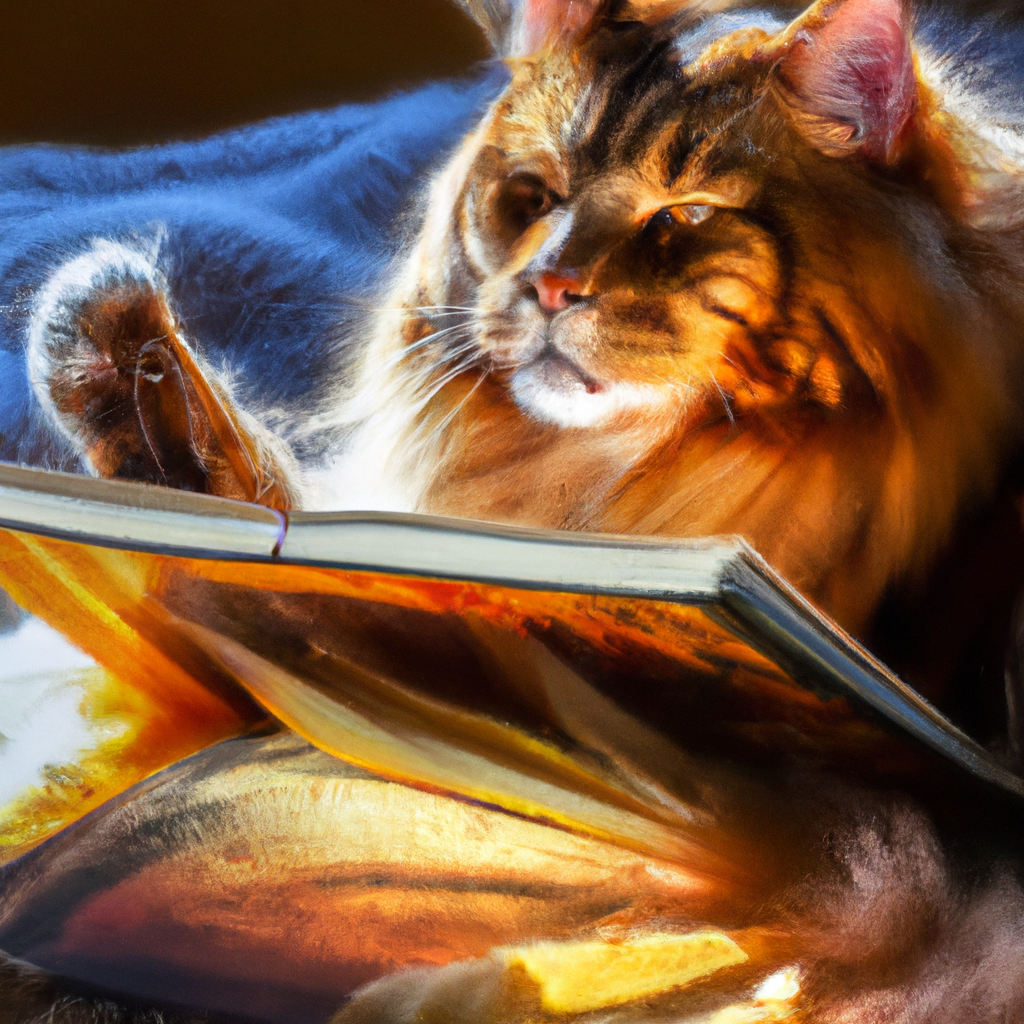

In [29]:
from image_generator import ImageGenerator

with open(os.path.join(test_dir, "test_cat_prompt.txt"), "r") as f:
    prompt = f.read()

ig = ImageGenerator()
ig.generate_and_save_image(
    prompt=prompt,
    save_path=os.path.join(test_dir, "cat_reading_test.png"),
)

In [13]:
from image_generator import ImageGenerator
import uuid

folder = "blonde_physicist"
os.makedirs(folder, exist_ok=True)

# with open(os.path.join(test_dir, "blonde_physicist.txt"), "r") as f:
#     prompt = f.read()

# print(f"Prompt:\n{prompt}")

Prompt:
An avatar of a young happy fun blonde woman wearing blue flannel shirt


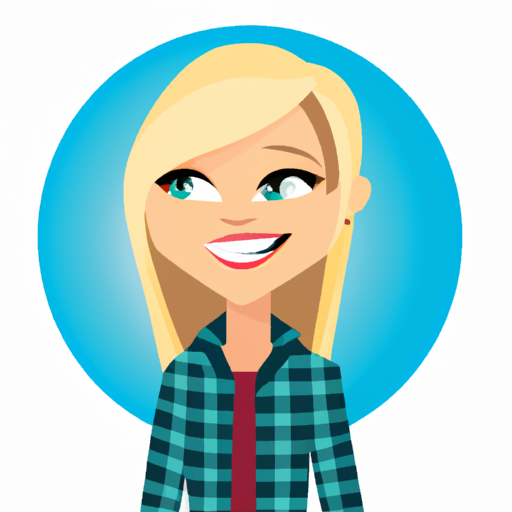

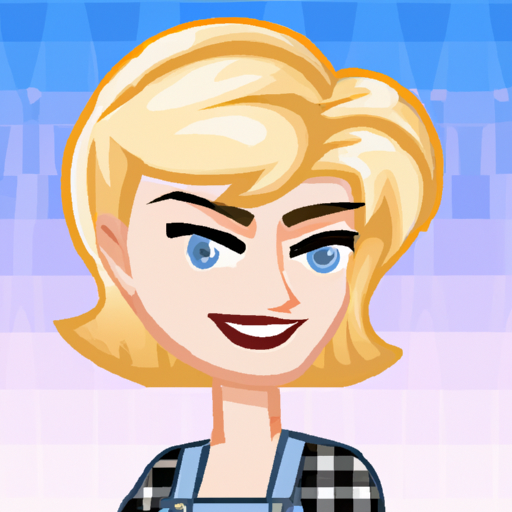

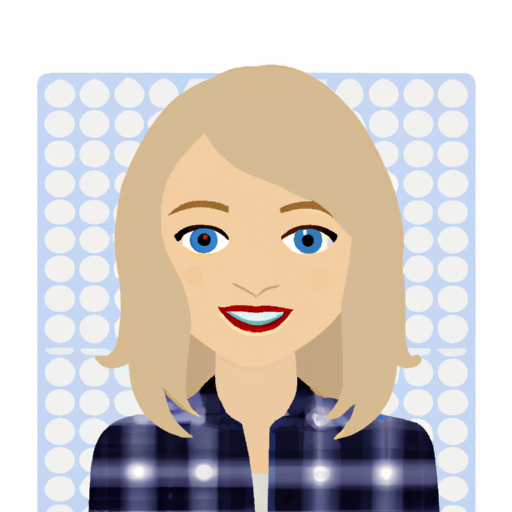

In [17]:
prompts = [
    "An avatar of a young happy fun blonde woman wearing blue flannel shirt",
    "Create an avatar of a blonde woman with a pleasant smile, wearing a blue flannel shirt. Her eyes should be sparkling and expressive, the hair styled casually, and she should exude a friendly and approachable vibe. The flannel shirt should have a classic checkered pattern, mostly in shades of blue, and the avatar should be set against a neutral background for emphasis on the character.",
    "Create a 2D avatar of a blonde woman with a pleasant smile, wearing a blue flannel shirt with a classic checkered pattern. She should be looking off to the side, with sparkling, expressive eyes. Her hair should be styled casually and she should exude a friendly and approachable vibe. The avatar should be set against a neutral background for emphasis on the character.",
]
for prompt in prompts:
    ig = ImageGenerator()
    ig.generate_and_save_image(
        prompt=prompt,
        save_path=os.path.join(folder, f"{str(uuid.uuid4())}.png"),
        size="md",
    )